In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import warnings

In [2]:
Assetdata = pd.read_csv("Assetdata.csv").drop(labels=0, axis=0)
Assetdata.index = Assetdata["Date"]
Assetdata = Assetdata.drop("Date", axis =1 ).dropna()
Assetdata


,EUR,GOLD,MXEA,MXEF,SPX,CTA,WTI OIL,Yen JPY,LUATTRUU
Date,,,,,,,,,
14/10/2022,0.9722,1644.47,1651.54,854.53,3669.91,3128.333,85.61,148.67,2146.57
13/10/2022,0.9776,1666.37,1647.94,865.34,3577.03,3127.180,89.11,147.12,2152.60
12/10/2022,0.9703,1673.19,1657.83,864.66,3588.84,3128.704,87.27,146.91,2163.37
11/10/2022,0.9708,1666.34,1672.13,884.81,3612.39,3109.501,89.35,145.86,2158.03
10/10/2022,0.9702,1668.61,1693.58,897.74,3639.66,3070.843,91.13,145.72,2163.28
...,...,...,...,...,...,...,...,...,...
6/12/2000,0.8920,270.00,1467.30,338.08,1402.05,999.759,28.77,110.19,958.71
5/12/2000,0.8799,266.35,1462.92,328.09,1389.94,998.242,28.02,111.16,956.22
4/12/2000,0.8857,265.85,1442.76,329.31,1387.12,1006.535,28.45,111.12,953.20


In [3]:
Assetdata["number"] = range(len(Assetdata))


In [4]:
Assetdata = Assetdata.sort_values(by=['number'], ascending=False)

Assetdata = Assetdata.drop("number", axis =1 ).dropna()

# Find the Tangency Portfolio of the 10 Assets

In [5]:
Assetdata

,EUR,GOLD,MXEA,MXEF,SPX,CTA,WTI OIL,Yen JPY,LUATTRUU
Date,,,,,,,,,
30/11/2000,0.8729,265.85,1454.88,332.62,1411.70,979.352,28.03,110.38,953.47
1/12/2000,0.8799,266.55,1449.06,326.36,1416.83,994.708,28.82,111.29,957.56
4/12/2000,0.8857,265.85,1442.76,329.31,1387.12,1006.535,28.45,111.12,953.20
5/12/2000,0.8799,266.35,1462.92,328.09,1389.94,998.242,28.02,111.16,956.22
6/12/2000,0.8920,270.00,1467.30,338.08,1402.05,999.759,28.77,110.19,958.71
...,...,...,...,...,...,...,...,...,...
10/10/2022,0.9702,1668.61,1693.58,897.74,3639.66,3070.843,91.13,145.72,2163.28
11/10/2022,0.9708,1666.34,1672.13,884.81,3612.39,3109.501,89.35,145.86,2158.03
12/10/2022,0.9703,1673.19,1657.83,864.66,3588.84,3128.704,87.27,146.91,2163.37


In [6]:
Assetdata["LUATTRUU"].pct_change().dropna().cumsum()-1

Date
1/12/2000    -0.995710
4/12/2000    -1.000264
5/12/2000    -0.997095
6/12/2000    -0.994491
7/12/2000    -0.996150
                ...   
10/10/2022   -0.155686
11/10/2022   -0.158113
12/10/2022   -0.155638
13/10/2022   -0.160616
14/10/2022   -0.163418
Name: LUATTRUU, Length: 5706, dtype: float64

In [7]:
# calculate returns of the assets
AssetReturn = Assetdata.drop("CTA", axis = 1).pct_change().dropna()
AssetReturn = AssetReturn * 100
pd.set_option('display.max_rows', 200)
AssetReturn.head(200)

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,LUATTRUU
Date,,,,,,,,
1/12/2000,0.801925,0.263306,-0.400033,-1.882028,0.363392,2.818409,0.824425,0.428959
4/12/2000,0.659166,-0.262615,-0.434765,0.903910,-2.096935,-1.283831,-0.152754,-0.455324
5/12/2000,-0.654849,0.188076,1.397322,-0.370472,0.203299,-1.511424,0.035997,0.316828
6/12/2000,1.375156,1.370377,0.299401,3.044896,0.871261,2.676660,-0.872616,0.260400
7/12/2000,-0.392377,-0.148148,1.183807,1.644581,-1.025641,2.294056,0.308558,-0.165848
8/12/2000,0.033765,-1.131306,0.016839,-0.320102,0.042517,0.033979,0.461413,-0.456578
11/12/2000,-1.181368,1.463140,-0.302373,1.664039,-3.037615,2.751359,-0.225144,-0.102860
12/12/2000,0.125242,-0.388242,0.026344,0.976338,0.451679,-0.628099,0.586696,0.482259
13/12/2000,-0.272913,0.668151,1.320890,-0.742236,0.630098,-0.033267,0.744795,-0.202852


In [8]:
# calculate mean and standard deviation of returns
meanReturns = AssetReturn.mean()
stdDev = AssetReturn.std()
tableIndex = AssetReturn.columns.to_list()
MeanStdTable = pd.DataFrame(data = meanReturns, index = tableIndex, columns=['Mean'])
MeanStdTable["Standard Deviation"] = stdDev
MeanStdTable

,Mean,Standard Deviation
EUR,0.003595,0.584311
GOLD,0.037614,1.064420
MXEA,0.008217,1.093481
MXEF,0.023397,1.169558
SPX,0.024531,1.246706
WTI OIL,-0.010524,5.128596
Yen JPY,0.007035,0.602653
LUATTRUU,0.014661,0.296064


In [9]:
# calculate the covariance matrix of the eight assets
covMatrix = AssetReturn.cov()
covMatrix

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,LUATTRUU
EUR,0.341419,0.034437,-0.001916,0.020451,-0.005777,-0.025512,-0.106956,0.000792
GOLD,0.034437,1.132990,-0.001478,0.020523,-0.000192,-0.103425,-0.028448,-0.001781
MXEA,-0.001916,-0.001478,1.195700,0.931663,0.018634,-0.062465,-0.040236,0.001399
MXEF,0.020451,0.020523,0.931663,1.367866,-0.015248,0.041721,-0.044996,0.007762
SPX,-0.005777,-0.000192,0.018634,-0.015248,1.554275,-0.072673,0.023844,0.000378
WTI OIL,-0.025512,-0.103425,-0.062465,0.041721,-0.072673,26.302494,-0.009127,-0.014719
Yen JPY,-0.106956,-0.028448,-0.040236,-0.044996,0.023844,-0.009127,0.363191,-0.000738
LUATTRUU,0.000792,-0.001781,0.001399,0.007762,0.000378,-0.014719,-0.000738,0.087654


In [10]:
# create a weight matrix
weights = np.array([0.1] * 8)
weights_matrix = np.asmatrix(weights)

# create a column vector of 1
e_matrix = np.array([1] * 8)
e_matrix = np.asmatrix(e_matrix)
e_matrix = e_matrix.T

# create a mean return matrix
meanReturns_matrix = meanReturns.to_numpy()
meanReturns_matrix = np.asmatrix(meanReturns)

# change the covariance dataframe to matrix
cov_matrix = covMatrix.to_numpy()
cov_matrix = np.asmatrix(covMatrix)

# find the inverse of the covariance matrix
inverse_cov_matrix = np.linalg.inv(cov_matrix)

## Calculate Alpha

# $\alpha  = {R}\prime + {V}^{-1}{e} $ 

In [11]:
alpha = meanReturns_matrix * inverse_cov_matrix * e_matrix
alpha = np.asarray(alpha)[0][0]
alpha

0.26874137004324933

## Calculate Zeta

# $\zeta={R}\prime{V}^{-1}{R}$

In [12]:
zeta = meanReturns_matrix * inverse_cov_matrix * meanReturns_matrix.T
zeta = np.asarray(zeta)[0][0] 
zeta

0.004790100052065193

## Calculate Delta

# $\delta = {e}\prime{V}^{-1}{e}$

In [13]:
delta = e_matrix.T * inverse_cov_matrix * e_matrix
delta = np.asarray(delta)[0][0] 
delta

22.180476529047716

In [14]:
#Denominator Check 1
denocheck1 = (alpha * meanReturns_matrix -(zeta * e_matrix)) * inverse_cov_matrix * (alpha * meanReturns_matrix - (zeta * e_matrix)).T
denocheck1 = np. asarray(denocheck1)[0][0]
denocheck1

0.00016298208992996605

In [15]:
#Denominator Check 2
denocheck2 = zeta*(zeta*delta-alpha**2)
denocheck2

0.00016298208992996597

In [16]:
Rmv = alpha/delta
Vmv = 1/delta
Stdmv = np.sqrt(Vmv)
cta = Assetdata["CTA"].pct_change().dropna()*100
Rp = cta.mean()
Rp

0.021662428415855986

# Tangency Portfolio Weights (W*)

In [17]:
def minvarfrontier(Rp):
    a = ((zeta * inverse_cov_matrix * e_matrix) - (alpha * inverse_cov_matrix * meanReturns_matrix.T ))/(zeta * delta - alpha**2)
    b = ((delta * inverse_cov_matrix * meanReturns_matrix.T ) - (alpha * inverse_cov_matrix * e_matrix ))/(zeta * delta - alpha**2)
    result = (a + (b * Rp))
    return result

In [18]:
Tangencyweights = minvarfrontier(Rp)
Tangencyweights = np.array(Tangencyweights)
Tangencyweights = pd.DataFrame(data = Tangencyweights, index = tableIndex, columns=['Tangency Weights'])
Tangencyweights

,Tangency Weights
EUR,-0.037625
GOLD,0.180118
MXEA,-0.098034
MXEF,0.147430
SPX,0.080253
WTI OIL,-0.002816
Yen JPY,0.043556
LUATTRUU,0.687118


In [19]:
AssetReturn.head()

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,LUATTRUU
Date,,,,,,,,
1/12/2000,0.801925,0.263306,-0.400033,-1.882028,0.363392,2.818409,0.824425,0.428959
4/12/2000,0.659166,-0.262615,-0.434765,0.903910,-2.096935,-1.283831,-0.152754,-0.455324
5/12/2000,-0.654849,0.188076,1.397322,-0.370472,0.203299,-1.511424,0.035997,0.316828
6/12/2000,1.375156,1.370377,0.299401,3.044896,0.871261,2.676660,-0.872616,0.260400
7/12/2000,-0.392377,-0.148148,1.183807,1.644581,-1.025641,2.294056,0.308558,-0.165848


In [20]:
AssetReturn["Expected Return"] = np.dot(AssetReturn, Tangencyweights)
AssetReturn

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,LUATTRUU,Expected Return
Date,,,,,,,,,
1/12/2000,0.801925,0.263306,-0.400033,-1.882028,0.363392,2.818409,0.824425,0.428959,0.130883
4/12/2000,0.659166,-0.262615,-0.434765,0.903910,-2.096935,-1.283831,-0.152754,-0.455324,-0.380401
5/12/2000,-0.654849,0.188076,1.397322,-0.370472,0.203299,-1.511424,0.035997,0.316828,0.106748
6/12/2000,1.375156,1.370377,0.299401,3.044896,0.871261,2.676660,-0.872616,0.260400,0.817950
7/12/2000,-0.392377,-0.148148,1.183807,1.644581,-1.025641,2.294056,0.308558,-0.165848,-0.074802
...,...,...,...,...,...,...,...,...,...
10/10/2022,-0.431034,-1.546477,-1.442073,-1.409008,-2.800359,-1.629965,0.323580,-0.389549,-0.802407
11/10/2022,0.061843,-0.136041,-1.266548,-1.440283,-0.749246,-1.953254,0.096075,-0.242687,-0.332205
12/10/2022,-0.051504,0.411081,-0.855197,-2.277325,-0.651923,-2.327924,0.719868,0.247448,-0.020310


In [21]:
Tangency_portfolio_return = AssetReturn["Expected Return"]

In [22]:
Tangency_portfolio_return.to_csv('Tangency_portfolio_return.csv')

In [23]:
AssetReturn["Cumulative Expected Return"] = np.cumsum(AssetReturn["Expected Return"])-1
AssetReturn

,EUR,GOLD,MXEA,MXEF,SPX,WTI OIL,Yen JPY,LUATTRUU,Expected Return,Cumulative Expected Return
Date,,,,,,,,,,
1/12/2000,0.801925,0.263306,-0.400033,-1.882028,0.363392,2.818409,0.824425,0.428959,0.130883,-0.869117
4/12/2000,0.659166,-0.262615,-0.434765,0.903910,-2.096935,-1.283831,-0.152754,-0.455324,-0.380401,-1.249517
5/12/2000,-0.654849,0.188076,1.397322,-0.370472,0.203299,-1.511424,0.035997,0.316828,0.106748,-1.142770
6/12/2000,1.375156,1.370377,0.299401,3.044896,0.871261,2.676660,-0.872616,0.260400,0.817950,-0.324820
7/12/2000,-0.392377,-0.148148,1.183807,1.644581,-1.025641,2.294056,0.308558,-0.165848,-0.074802,-0.399622
...,...,...,...,...,...,...,...,...,...,...
10/10/2022,-0.431034,-1.546477,-1.442073,-1.409008,-2.800359,-1.629965,0.323580,-0.389549,-0.802407,123.706840
11/10/2022,0.061843,-0.136041,-1.266548,-1.440283,-0.749246,-1.953254,0.096075,-0.242687,-0.332205,123.374635
12/10/2022,-0.051504,0.411081,-0.855197,-2.277325,-0.651923,-2.327924,0.719868,0.247448,-0.020310,123.354325


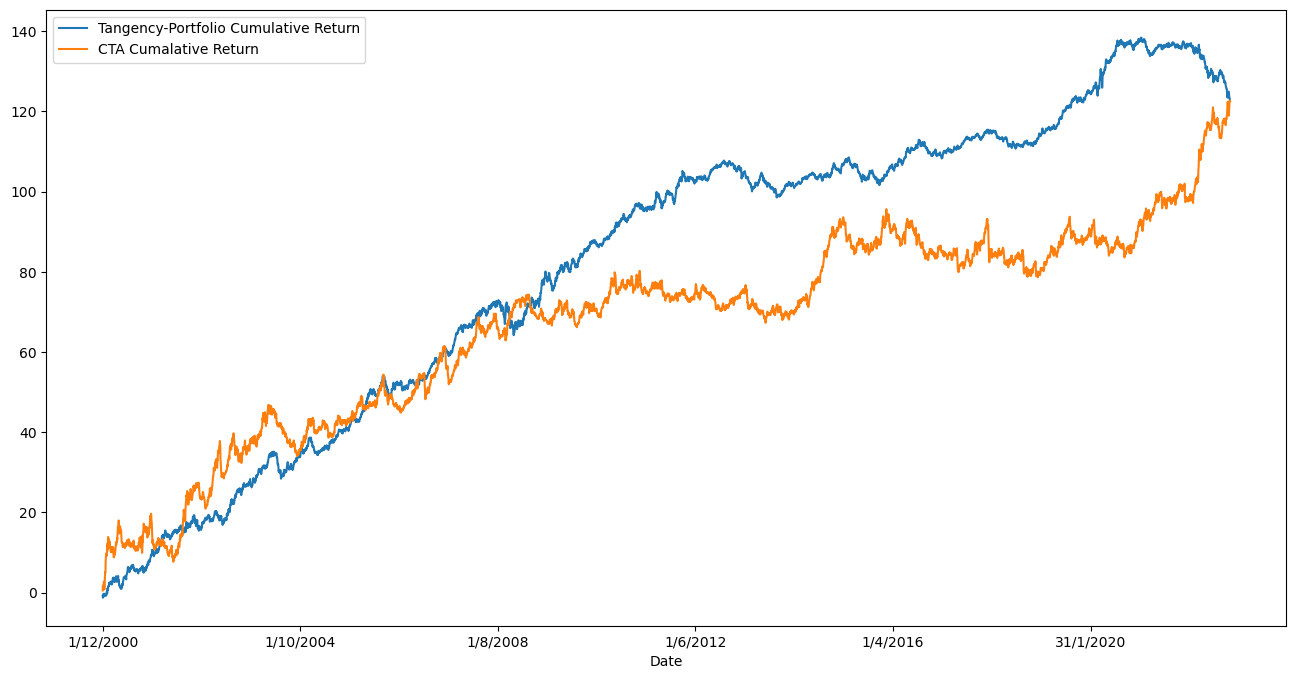

In [24]:
df_plot = pd.DataFrame({"Tangency-Portfolio Cumulative Return": AssetReturn["Cumulative Expected Return"],
                            "CTA Cumalative Return": cta.cumsum()-1},
                           index = cta.index)
    
    #np.cumprod(df_plot + 1).plot(title = "RETURNS of the equal weighted index versus Eigen-portfolio",
                                 #figsize = (16, 8)
                                #)
df_plot.plot(figsize = (16, 8), label = ["Tangency-Portfolio Cumulative Return", "CTA Cumalative Return"])
plt.show()